In [5]:
from qiskit import QuantumCircuit


from qiskit.visualization import plot_histogram
import numpy as np

# Define a simple circuit (e.g., a Hadamard gate on one qubit)
circ = QuantumCircuit(1)
circ.h(0)

# Set the backend to unitary_simulator
#backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit
#job = execute(circ, backend)
#result = job.result()

# Get the unitary matrix
#unitary_matrix = result.get_unitary(circ, decimals=3)

# Print the matrix
#print(unitary_matrix)

ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\nat\miniconda3\envs\gic25_py312\Lib\site-packages\qiskit\__init__.py)

In [41]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector 
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

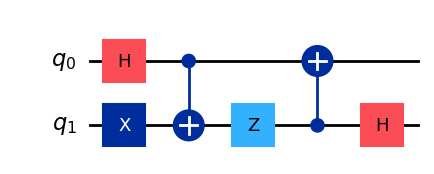

In [25]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0,1)
qc.z(1)
qc.cx(1,0)
qc.h(1)
qc.draw(output="mpl")

In [26]:
state = Statevector(qc)
print(state)

Statevector([ 0.00000000e+00+0.j, -2.23711432e-17+0.j, -0.00000000e+00+0.j,
              1.00000000e+00+0.j],
            dims=(2, 2))


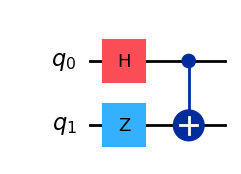

In [28]:
qc = QuantumCircuit(2)
qc.h(0)
qc.z(1)
qc.cx(0,1)
qc.draw(output="mpl")

In [29]:
state = Statevector(qc)
print(state)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [42]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.s(1)
qc.cx(1,0)
qc.h(0)
qc.h(1)

In [45]:
unitary_matrix = Operator(qc).data

# Print the matrix
print(type(unitary_matrix))
print(unitary_matrix/.5)

<class 'numpy.ndarray'>
[[ 1.+0.j  1.+0.j  0.+1.j  0.+1.j]
 [-1.+0.j  1.+0.j  0.+1.j  0.-1.j]
 [ 1.+0.j  1.+0.j  0.-1.j  0.-1.j]
 [-1.+0.j  1.+0.j  0.-1.j  0.+1.j]]


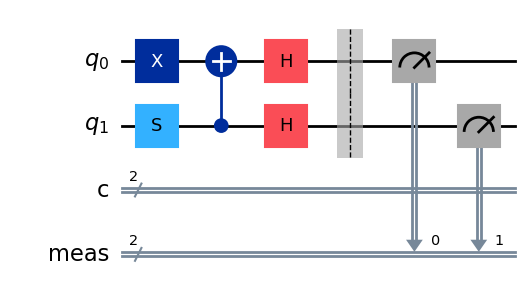

In [38]:
qc.measure_all()
qc.draw(output="mpl")

<class 'qiskit.result.result.Result'>


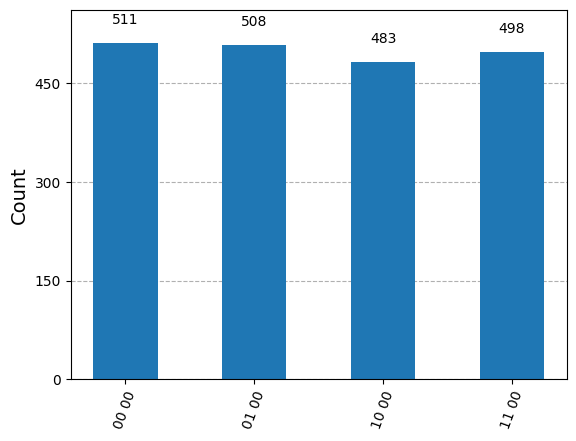

In [40]:
backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=2000).result()   

print(type(result))

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)


## CHSH Game

In [50]:
import random
from math import pi

In [59]:
def chsh_game(strategy):
    # This function runs the CHSH game, using the strategy (a function
    # from two bits to two bits), returning 1 for a win and 0 for a loss.

    # Choose x and y randomly
    x, y = random.randint(0, 2), random.randint(0, 2)

    # Use the strategy to determine a and b
    a, b = strategy(x, y)

    # Decide if the strategy wins or loses
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [66]:
def chsh_circuit(x, y):
    # This function creates a `QuantumCircuit` implementing the quantum
    # strategy described above (including the e-bit preparation).

    qc = QuantumCircuit(2, 2)

    # Prepare an e-bit
    qc.x(1)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice's actions
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob's actions
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

(x,y) = (0,0)


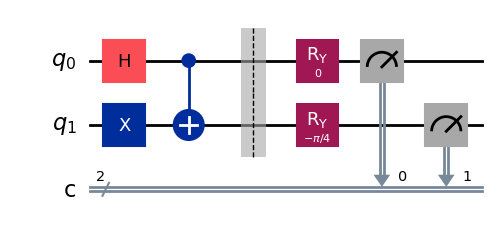

(x,y) = (0,1)


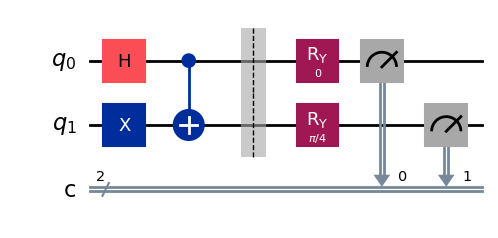

(x,y) = (1,0)


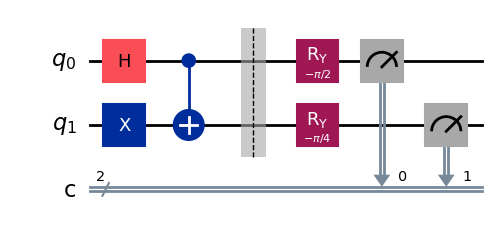

(x,y) = (1,1)


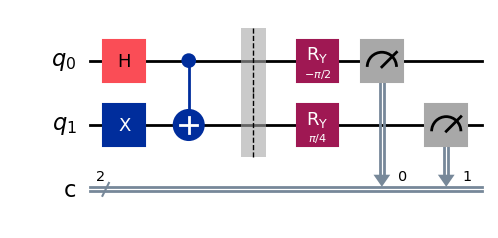

In [67]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output="mpl"))

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output="mpl"))

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output="mpl"))

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

In [68]:
def quantum_strategy(x, y):
    # This function runs the appropriate quantum circuit defined above
    # one time and returns the measurement results

    # Setting `shots=1` to run the circuit once
    result = BasicSimulator().run(chsh_circuit(x, y), shots=1).result()
    #result = AerSimulator().run(chsh_circuit(x, y), shots=1).result()
    statistics = result.get_counts()

    # Determine the output bits and return them
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [70]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.341


In [64]:
def classical_strategy(x, y):
    # This function implements just one example of an optimal classical
    # strategy for the CHSH game. Other classical strategies can be
    # implemented by changing the bit values assigned to a and b.

    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

In [65]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

UnboundLocalError: cannot access local variable 'b' where it is not associated with a value